<a href="https://colab.research.google.com/github/ameer5925/DataBootcampFinal/blob/main/Ameer_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# load data
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]
print('data size = ', feature.shape)
print('target size = ', price.shape)
'''
from: data_url:
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']


data size =  (506, 13)
target size =  (506,)


In [32]:
# more details of data
df_feature = pd.DataFrame(feature, columns = feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [33]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 640x480 with 0 Axes>

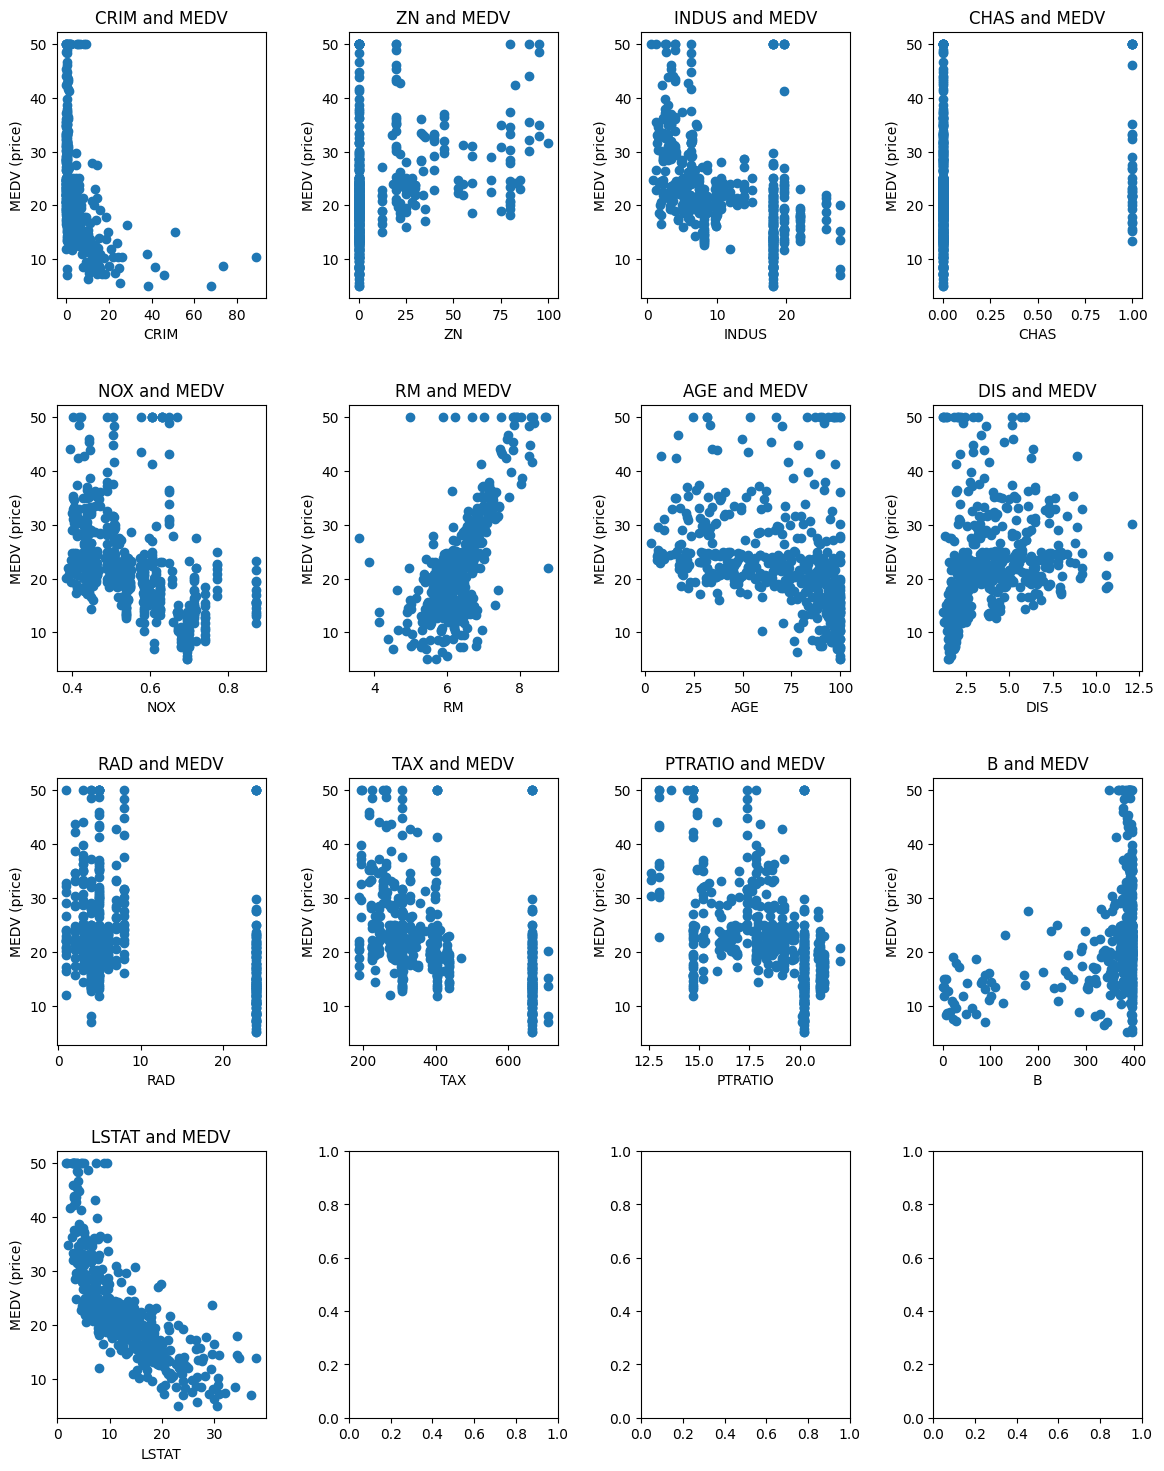

In [35]:
### General Scatter Plots
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(len(feature_names)):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(feature_names[i])
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

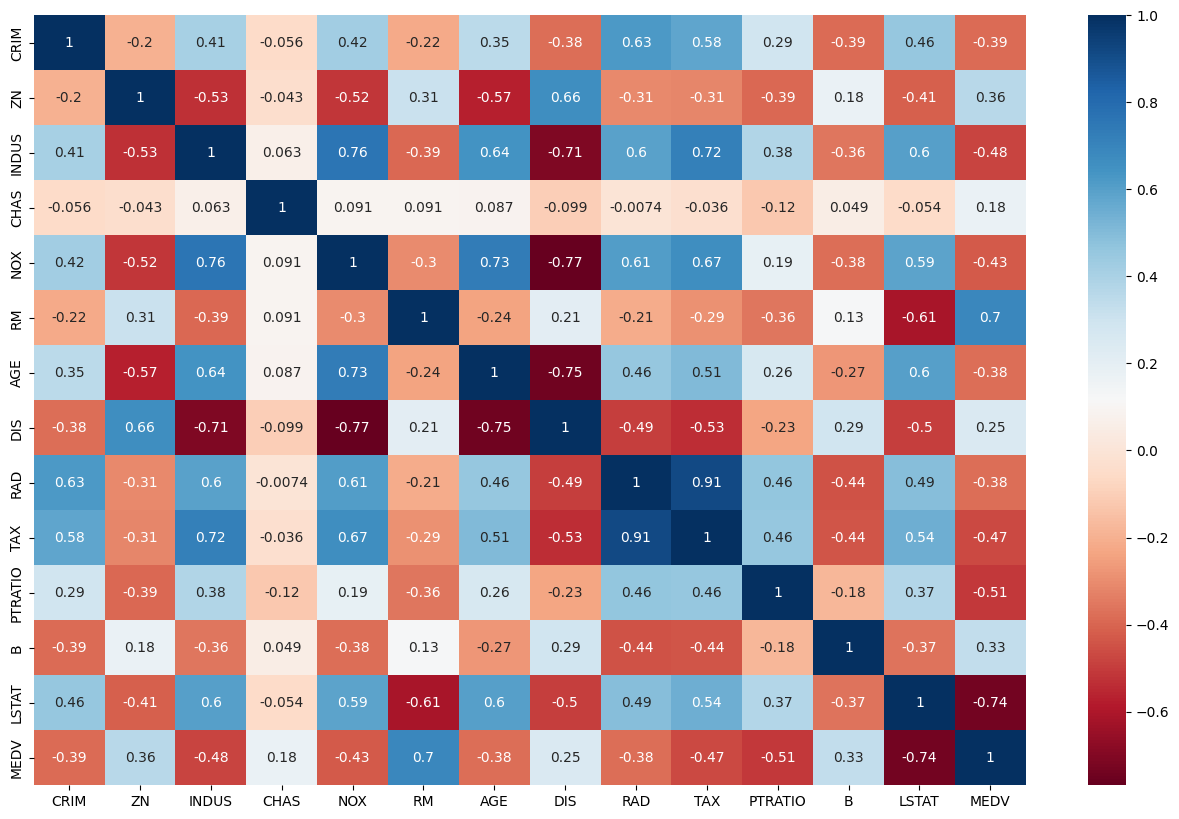

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [36]:
###Correlation Matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [37]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [38]:
# Linear & Ridge Regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=20, fit_intercept=False)  # Ridge parameter is `alpha`
ridge_model.fit(X_train, y_train)

# Predictions for Linear Regression
pred_X_train = linear_model.predict(X_train)
pred_X_test = linear_model.predict(X_test)

# RMSE for Linear Regression
rmse_X_train = np.sqrt(mean_squared_error(y_train, pred_X_train))
rmse_X_test = np.sqrt(mean_squared_error(y_test, pred_X_test))
print("Linear Regression RMSE - Train:", rmse_X_train)
print("Linear Regression RMSE - Test:", rmse_X_test)

# Predictions for Ridge Regression
pred_X_train_ridge = ridge_model.predict(X_train)
pred_X_test_ridge = ridge_model.predict(X_test)

# RMSE for Ridge Regression
rmse_X_train_ridge = np.sqrt(mean_squared_error(y_train, pred_X_train_ridge))
rmse_X_test_ridge = np.sqrt(mean_squared_error(y_test, pred_X_test_ridge))
print("Ridge Regression RMSE - Train:", rmse_X_train_ridge)
print("Ridge Regression RMSE - Test:", rmse_X_test_ridge)



Linear Regression RMSE - Train: 4.820626531838223
Linear Regression RMSE - Test: 5.2092175105308804
Ridge Regression RMSE - Train: 4.847405076357641
Ridge Regression RMSE - Test: 5.188535442021793


In [39]:
#Linear & Ridge Regression Coefficients
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Select top-3 features
idx = [5, 10, 12]  # Indices for top 3 features
top3 = feature[:, idx]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(top3, price, test_size=0.3, random_state=8)

# Feature names for top 3 features
top3_feature_names = [feature_names[i] for i in idx]

# Linear Regression
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train, y_train)
theta = linear_model.coef_

df_theta = pd.DataFrame(zip(top3_feature_names, theta), columns=['Feature', 'Coeff'])
print("Linear Regression Coefficients:")
print(df_theta)

# RMSE for Linear Regression
pred_X_train = linear_model.predict(X_train)
pred_X_test = linear_model.predict(X_test)

rmse_X_train = np.sqrt(mean_squared_error(y_train, pred_X_train))
rmse_X_test = np.sqrt(mean_squared_error(y_test, pred_X_test))

print("Linear Regression RMSE - Train:", rmse_X_train)
print("Linear Regression RMSE - Test:", rmse_X_test)

# Ridge Regression
ridge_model = Ridge(alpha=15, fit_intercept=False)
ridge_model.fit(X_train, y_train)
theta_r = ridge_model.coef_

df_theta_r = pd.DataFrame(zip(top3_feature_names, theta_r), columns=['Feature', 'Coeff'])
print("\nRidge Regression Coefficients:")
print(df_theta_r)

# RMSE for Ridge Regression
pred_X_train_ridge = ridge_model.predict(X_train)
pred_X_test_ridge = ridge_model.predict(X_test)

rmse_X_train_ridge = np.sqrt(mean_squared_error(y_train, pred_X_train_ridge))
rmse_X_test_ridge = np.sqrt(mean_squared_error(y_test, pred_X_test_ridge))

print("Ridge Regression RMSE - Train:", rmse_X_train_ridge)
print("Ridge Regression RMSE - Test:", rmse_X_test_ridge)

Linear Regression Coefficients:
   Feature     Coeff
0       RM  6.405904
1  PTRATIO -0.595916
2    LSTAT -0.536277
Linear Regression RMSE - Train: 5.273361751695365
Linear Regression RMSE - Test: 5.494723646664582

Ridge Regression Coefficients:
   Feature     Coeff
0       RM  6.151543
1  PTRATIO -0.498355
2    LSTAT -0.554668
Ridge Regression RMSE - Train: 5.27979861957438
Ridge Regression RMSE - Test: 5.471712123540426


In [40]:
###General Regression Plots
import plotly.express as px
import plotly.graph_objects as go


for feature in feature_names:
    fig = px.scatter(df_boston, x=feature, y="MEDV", trendline="ols",
                     title=f"{feature} vs MEDV",
                     labels={feature: feature, "MEDV": "Median House Price"})
    fig.show()

Correlation between B and MEDV: 0.33


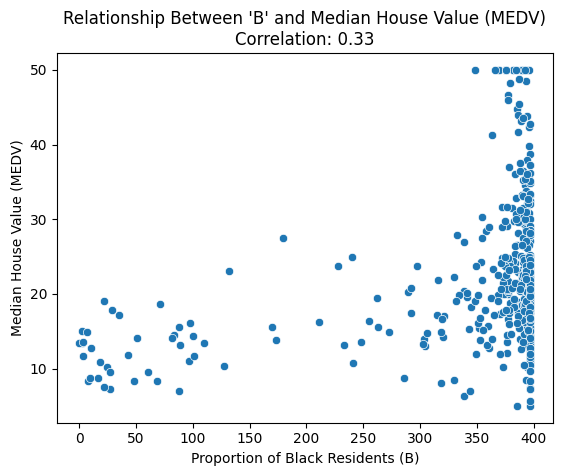

                B        MEDV
count  506.000000  506.000000
mean   356.674032   22.532806
std     91.294864    9.197104
min      0.320000    5.000000
25%    375.377500   17.025000
50%    391.440000   21.200000
75%    396.225000   25.000000
max    396.900000   50.000000
Correlation between LSTAT and MEDV: -0.74


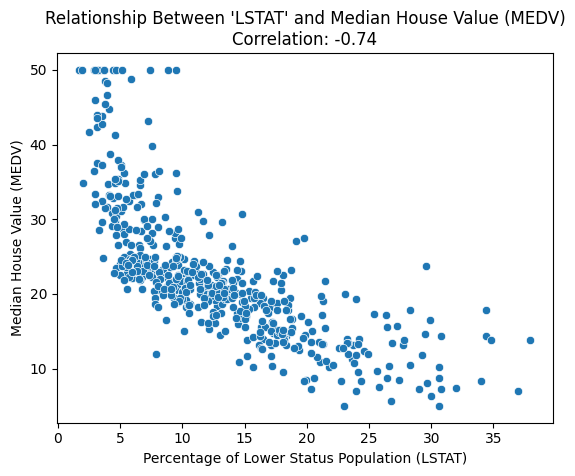

            LSTAT        MEDV
count  506.000000  506.000000
mean    12.653063   22.532806
std      7.141062    9.197104
min      1.730000    5.000000
25%      6.950000   17.025000
50%     11.360000   21.200000
75%     16.955000   25.000000
max     37.970000   50.000000


In [41]:
###Controversial Correlation Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                 'TAX', 'PTRATIO', 'B', 'LSTAT']

data = pd.DataFrame(feature, columns=feature_names)
data['MEDV'] = price

correlation_b = data['B'].corr(data['MEDV'])
print(f"Correlation between B and MEDV: {correlation_b:.2f}")

sns.scatterplot(x='B', y='MEDV', data=data)
plt.title(f"Relationship Between 'B' and Median House Value (MEDV)\nCorrelation: {correlation_b:.2f}")
plt.xlabel("Proportion of Black Residents (B)")
plt.ylabel("Median House Value (MEDV)")
plt.show()

print(data[['B', 'MEDV']].describe())

correlation_lstat = data['LSTAT'].corr(data['MEDV'])
print(f"Correlation between LSTAT and MEDV: {correlation_lstat:.2f}")

sns.scatterplot(x='LSTAT', y='MEDV', data=data)
plt.title(f"Relationship Between 'LSTAT' and Median House Value (MEDV)\nCorrelation: {correlation_lstat:.2f}")
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Median House Value (MEDV)")
plt.show()

print(data[['LSTAT', 'MEDV']].describe())



In [42]:
###KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert the features and target to DataFrame for compatibility
import pandas as pd

features_df = pd.DataFrame(feature, columns=feature_names)
target = price

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the k-NN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 20.60552941176471
R² Score: 0.7190172315709293


Random Forest - Train RMSE: 1.44, R2: 0.98
Random Forest - Test RMSE: 3.10, R2: 0.87

Feature Importances:
    Feature  Importance
5        RM    0.439585
12    LSTAT    0.379941
7       DIS    0.066120
0      CRIM    0.031731
10  PTRATIO    0.019494
11        B    0.012656
4       NOX    0.012637
6       AGE    0.012022
9       TAX    0.011789
2     INDUS    0.006785
8       RAD    0.004050
3      CHAS    0.001600
1        ZN    0.001591


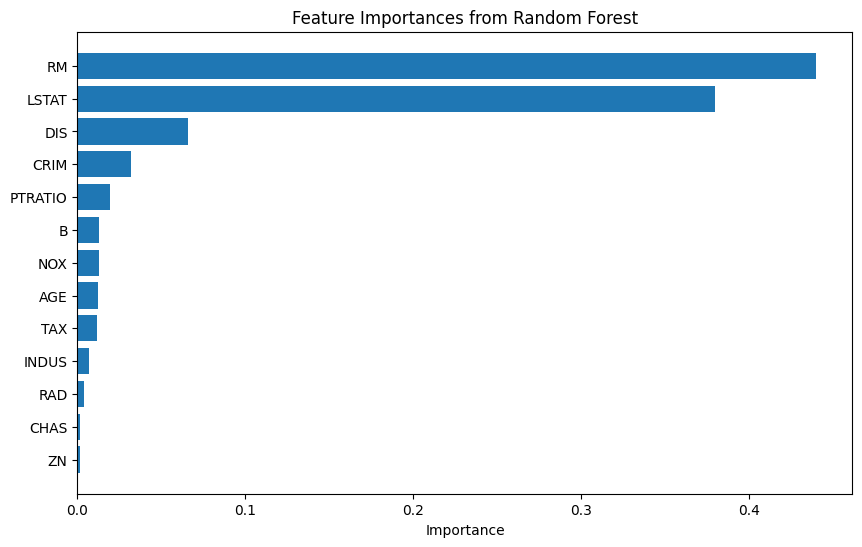

In [43]:
###Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]


feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                 'TAX', 'PTRATIO', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Random Forest - Train RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
print(f"Random Forest - Test RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")


importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importance_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.show()



Linear Regression Coefficients:
   Feature     Coeff
0       RM  6.405904
1  PTRATIO -0.595916
2    LSTAT -0.536277
Linear Regression RMSE - Train: 5.273361751695365
Linear Regression RMSE - Test: 5.494723646664582

Ridge Regression Coefficients:
   Feature     Coeff
0       RM  6.151543
1  PTRATIO -0.498355
2    LSTAT -0.554668
Ridge Regression RMSE - Train: 5.27979861957438
Ridge Regression RMSE - Test: 5.471712123540426
Correlation between B and MEDV: 0.33


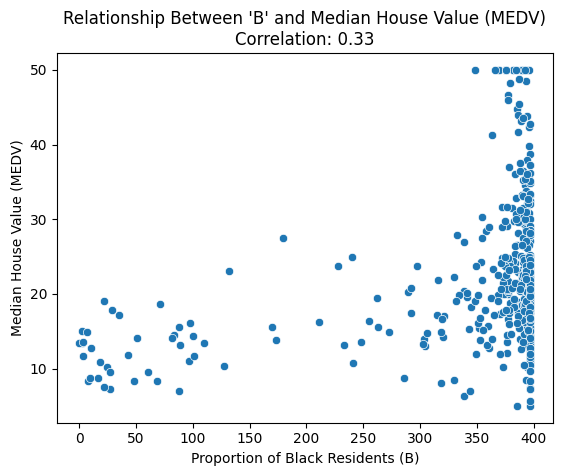

Correlation between LSTAT and MEDV: -0.74


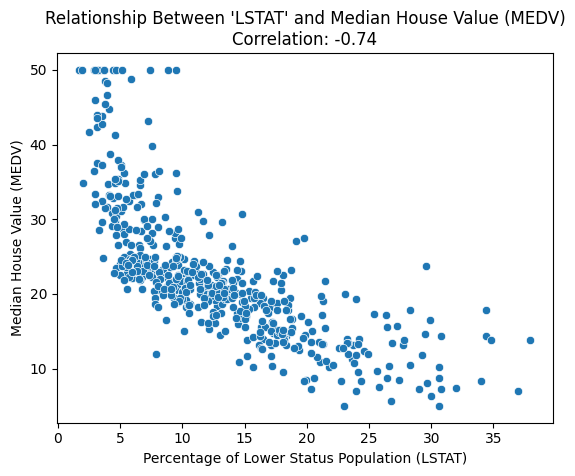

Mean Squared Error: 20.60552941176471
R² Score: 0.7190172315709293

Feature Importances:
    Feature  Importance
5        RM    0.439585
12    LSTAT    0.379941
7       DIS    0.066120
0      CRIM    0.031731
10  PTRATIO    0.019494
11        B    0.012656
4       NOX    0.012637
6       AGE    0.012022
9       TAX    0.011789
2     INDUS    0.006785
8       RAD    0.004050
3      CHAS    0.001600
1        ZN    0.001591


In [45]:
####Conclusion (Reprint and display the results again)

# Linear Regression Results
print("\nLinear Regression Coefficients:")
print(df_theta)
print(f"Linear Regression RMSE - Train: {rmse_X_train}")
print(f"Linear Regression RMSE - Test: {rmse_X_test}")

# Ridge Regression Results
print("\nRidge Regression Coefficients:")
print(df_theta_r)
print(f"Ridge Regression RMSE - Train: {rmse_X_train_ridge}")
print(f"Ridge Regression RMSE - Test: {rmse_X_test_ridge}")

# Correlation and visualization for B vs MEDV
correlation_b = data['B'].corr(data['MEDV'])
print(f"Correlation between B and MEDV: {correlation_b:.2f}")

sns.scatterplot(x='B', y='MEDV', data=data)
plt.title(f"Relationship Between 'B' and Median House Value (MEDV)\nCorrelation: {correlation_b:.2f}")
plt.xlabel("Proportion of Black Residents (B)")
plt.ylabel("Median House Value (MEDV)")
plt.show()

# Correlation and visualization for LSTAT vs MEDV
correlation_lstat = data['LSTAT'].corr(data['MEDV'])
print(f"Correlation between LSTAT and MEDV: {correlation_lstat:.2f}")

sns.scatterplot(x='LSTAT', y='MEDV', data=data)
plt.title(f"Relationship Between 'LSTAT' and Median House Value (MEDV)\nCorrelation: {correlation_lstat:.2f}")
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Median House Value (MEDV)")
plt.show()

# KNN Results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

##RANDOM FOREST
print("\nFeature Importances:")
print(importance_df)
